In [3]:
import tensorflow as tf
import numpy as np

In [83]:
x_data = [1,2,3,4,5,6,7]
y_data = [25000,55000,75000,110000,128000,155000,180000]

In [84]:
y_data = np.array(y_data)/100785

In [85]:
y_data


array([0.24805279, 0.54571613, 0.74415836, 1.09143226, 1.27003026,
       1.53792727, 1.78598006])

In [86]:
x_data = np.array(x_data)/1.

In [87]:
y_data[2]

0.744158356898348

In [88]:
x_data.shape

(7,)

In [89]:
model = tf.keras.Sequential([
    Input(shape=(1,)),
    tf.keras.layers.Dense(units=20,activation = 'sigmoid'),
    tf.keras.layers.Dense(units=20,activation = 'sigmoid'),
    tf.keras.layers.Dense(1,activation='linear')
])
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_data, y_data, epochs=1000,batch_size=3)
x_new = np.array([2], dtype=float)
y_pred = model.predict(x_data)
print("예측된 y 값:", y_pred[0, 0])

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3236
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3158
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3168
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3142
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3116
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3093
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.3051
Epoch 8/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.2993
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3023
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2954
Epoch 11/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2920
Epoch 12/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.2893
Epoch 13/1000
3/3 [=============================

In [92]:
print("예측된 y 값:", y_pred[0,0]*100785)

예측된 y 값: 25044.015667811036


In [9]:
tf.cast(tf.constant(2),tf.float32)+tf.constant(5.2)

<tf.Tensor: shape=(), dtype=float32, numpy=7.2>

In [10]:
from tensorflow.keras.layers import Dense,Activation,Flatten,Input

In [11]:
Dense(10, activation='softmax')

In [12]:
Dense(10, activation='relu',name = 'Dense Layer')

In [13]:
Dense(10, kernel_initializer = 'he_normal', name = 'Dense Layer')

In [14]:
dense = Dense(10,activation='relu',name = 'Dense layer')
Activation(dense)

## Flatten

In [ ]:
Flatten(input_shape=(128,3,2,2))

In [ ]:
Input(shape=(28,28),dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_1')>

In [ ]:
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential()
model.add(Input(shape=(28,28)))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_3 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_4 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39810 (155.51 KB)
Trainable params: 39810 (155.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
inputs = Input(shape=(28,28,1))
x = Flatten(input_shape = (28,28,1))(inputs)
x = Dense(300,activation='relu')(x)
x = Dense(100,activation='relu')(x)
x = Dense(10,activation='softmax')(x)
model = Model(inputs=inputs,outputs = x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Concatenate

input_layer = Input(shape=(28,28))
hidden1 = Dense(100,activation='relu')(input_layer)
hidden2 = Dense(100,activation='relu')(hidden1)
concat = Concatenate()([input_layer,hidden2])
output = Dense(1)(concat)
model = Model(inputs = [input_layer],outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 28, 100)              2900      ['input_4[0][0]']             
                                                                                                  
 dense_9 (Dense)             (None, 28, 100)              10100     ['dense_8[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 28, 128)              0         ['input_4[0][0]',             
                                                                     'dense_9[0][0]']       

In [ ]:
input_ = Input(shape=(10,10),name='input_')
hidden1 = Dense(100,activation='relu')(input_)
hidden2 = Dense(10,activation='relu')(hidden1)
output = Dense(1,activation='sigmoid',name='main_output')(hidden2)
sub_out = Dense(1,name='sum_output')(hidden2)
model = Model(inputs = [input_],outputs=[output,sub_out])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ (InputLayer)         [(None, 10, 10)]             0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 10, 100)              1100      ['input_[0][0]']              
                                                                                                  
 dense_12 (Dense)            (None, 10, 10)               1010      ['dense_11[0][0]']            
                                                                                                  
 main_output (Dense)         (None, 10, 1)                11        ['dense_12[0][0]']            
                                                                                            

In [ ]:
class Mymodel(Model):
    def __init__(self,units=30,activation='relu',**kwargs):
        super(Mymodel,self).__init__(**kwargs)
        self.dense_layer1 = Dense(300,activation=activation)
        self.dense_layer2 = Dense(100,activation=activation)
        self.dense_layer3 = Dense(units,activation=activation)
        self.output_layer = Dense(10,activation='softmax')
    
    def call(self,inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        x = self.dense_layer3(x)
        x = self.output_layer(x)
        return x

In [ ]:
inputs = Input(shape=(28,28,1))
x = Flatten(input_shape = (28,28,1))(inputs)
x = Dense(300,activation='relu')(x)
x = Dense(100,activation='relu')(x)

model = Model(inputs=[inputs],outputs=[x])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 300)               235500    
                                                                 
 dense_14 (Dense)            (None, 100)               30100     
                                                                 
Total params: 265600 (1.01 MB)
Trainable params: 265600 (1.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
hidden2 =model.get_layer('dense_13')

In [ ]:
weighs,biases = hidden2.get_weights()
print(weighs.shape)
print(biases.shape)

(784, 300)
(300,)


## 모델 컴파일

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [ ]:
## 손실함수 종류
'sparse_categorical_crossentropy' '베타분류'
'categorical_cross_entropy' '원핫 인코딩'
'binary_crossentroy' '이진분류'

'binary_crossentroy이진분류'

평균오차 절대

Regression 문제에서 자주 사용

$E = 1/n\Sigma|y_i - y|$

MSL(평균오차제곱)
Regresiion 문제에서 자주 사용

$E = 1/n\Sigma|y_i-y|$

교차 엔트로피 오차

y = log(x)와 비슷한 구조를 가지며

1에 가까울수록 0이되고 0에 가까워질수록 무한해지는 함수이다.

$E = -1/N \Sigma \Sigma y_i log(\hat y_i)$

옵티마이저

- Learning rate

지표
- Metrics (acc,mae)

모델학습,평가 및 예측
- fit()
x y epochs batch_size validation data
-evaluate()
-predict()

오차역전파
-chain rule


## One Hot Encoding

각각의 요소가 해당하는 위치에 하나의 1 값을 가지는 인코딩

## MINIST

In [35]:
import tensorflow as tf 
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import to_categorical, plot_model

from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')


C:\Users\pop75\AppData\Local\Temp\ipykernel_5052\804065964.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
tf.random.set_seed(151)

(x_train_full,y_train_full),(x_test,y_test)=load_data(path='mnist.npz')

x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.3,random_state=151)

In [ ]:
num_x_train = (x_train.shape[0])
num_x_val = (x_val.shape[0])
num_x_test = (x_test.shape[0])

print("학습 데이터 : {}\t레이블: {}".format(x_train_full.shape,y_train_full.shape))
print("학습 데이터 : {}\t레이블: {}".format(x_train.shape,y_train.shape))
print("학습 데이터 : {}\t레이블: {}".format(x_val.shape,y_val.shape))
print("학습 데이터 : {}\t레이블: {}".format(x_test.shape,y_test.shape))

학습 데이터 : (60000, 28, 28)	레이블: (60000,)
학습 데이터 : (42000, 28, 28)	레이블: (42000,)
학습 데이터 : (18000, 28, 28)	레이블: (18000,)
학습 데이터 : (10000, 28, 28)	레이블: (10000,)


8
3
0
7
9


C:\Users\pop75\AppData\Local\Temp\ipykernel_18148\467143807.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,len(random_idxs),i+1)


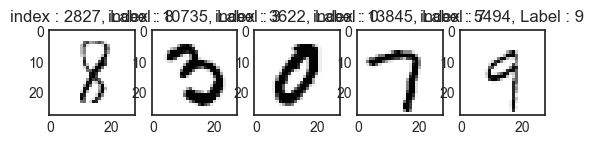

In [ ]:
num_sample = 5
random_idxs = np.random.randint(18000, size=num_sample)

plt.plot(figsize=(15,3))
for i,idx in enumerate(random_idxs):
    img = x_val[idx,:]
    label = y_val[idx]
    plt.subplot(1,len(random_idxs),i+1)
    plt.imshow(img)
    plt.title('index : {}, Label : {}'.format(idx,label))
    print(label)


In [ ]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential([Input(shape=(28,28),name = 'input'),Flatten(input_shape = [28,28],name='flatten'),Dense(100,activation='relu',name='dense1'),Dense(64,activation='relu',name='dense2'),
Dense(32,activation='relu',name='dense3'),
Dense(10,activation='softmax',name='output')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy',
optimizer = 'Adam',
metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/50
329/329 [==============================] - 4s 7ms/step - loss: 0.4492 - accuracy: 0.8690 - val_loss: 0.2002 - val_accuracy: 0.9423
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.1638 - accuracy: 0.9516 - val_loss: 0.1463 - val_accuracy: 0.9562
Epoch 3/50
329/329 [==============================] - 1s 5ms/step - loss: 0.1181 - accuracy: 0.9647 - val_loss: 0.1309 - val_accuracy: 0.9617
Epoch 4/50
329/329 [==============================] - 2s 6ms/step - loss: 0.0920 - accuracy: 0.9720 - val_loss: 0.1144 - val_accuracy: 0.9663
Epoch 5/50
329/329 [==============================] - 2s 5ms/step - loss: 0.0703 - accuracy: 0.9779 - val_loss: 0.1173 - val_accuracy: 0.9642
Epoch 6/50
329/329 [==============================] - 2s 6ms/step - loss: 0.0583 - accuracy: 0.9821 - val_loss: 0.1072 - val_accuracy: 0.9691
Epoch 7/50
329/329 [==============================] - 2s 6ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.1094 - val_accuracy: 0.9691
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

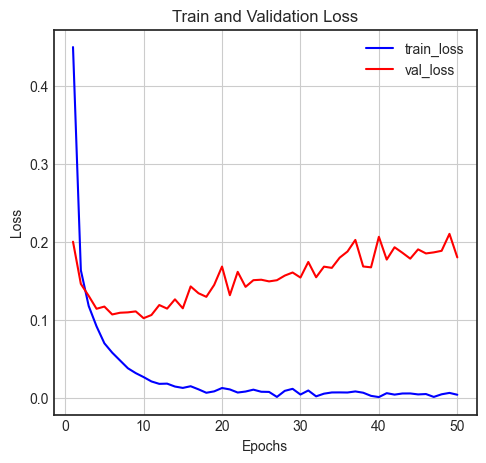

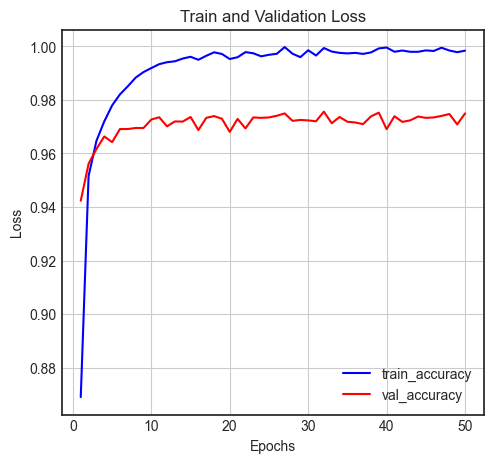

In [ ]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


loss = history_dict['accuracy']
val_loss = history_dict['val_accuracy']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_accuracy')
ax2.plot(epochs,val_loss,color='red',label='val_accuracy')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()


plt.show()

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)

np.set_printoptions(precision=3)
print(pred_ys[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[1.120e-17 1.065e-16 5.710e-11 1.683e-15 3.610e-21 6.931e-17 2.813e-22
 1.000e+00 1.298e-18 2.345e-17]


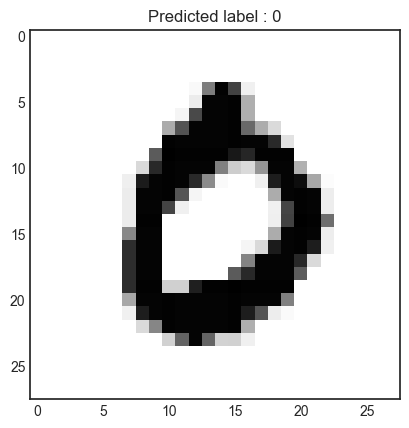

In [ ]:
arg_pred_y = np.argmax(pred_ys[3],axis=0)
plt.imshow(x_test[3])
plt.title('Predicted label : {}'.format(arg_pred_y))
plt.show()

## 혼돈 행렬(Confusion Matrix)

Text(47.25, 0.5, 'True Label')

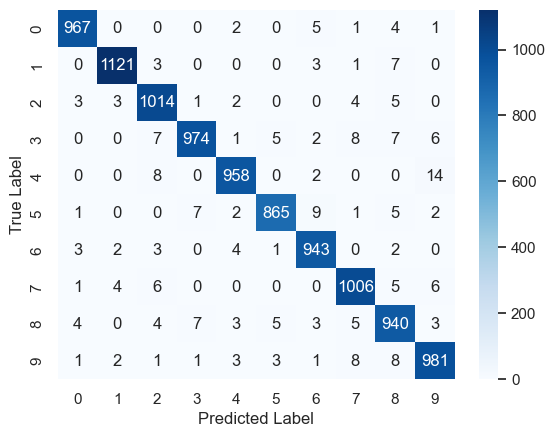

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.Figure(figsize=(8,8))
cm = confusion_matrix(np.argmax(y_test,axis=1),np.argmax(pred_ys,axis=1))
## data : cm, annot : 수 표기할지 fmt : 표기하는 수 형식, cmap:색깔지정
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

- 분류보고서

In [ ]:
print(classification_report(np.argmax(y_test,axis=-1),np.argmax(pred_ys,axis=-1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



- 모델 저장과 복원

- save()
- load_model()
- 중요! 서브클래싱 방식으로는 저장불가!!
- 서브클래싱에선 save_weighs(), load_weighs() 로 저장 불러옴

In [ ]:
model.save('mnist_model.h5')

c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 100)               78500     
                                                                 
 dense2 (Dense)              (None, 64)                6464      
                                                                 
 dense3 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 87374 (341.30 KB)
Trainable params: 87374 (341.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)

np.set_printoptions(precision=7)
print(pred_ys2[0])

313/313 [==============================] - 0s 1ms/step
(10000, 10)
[1.1203175e-17 1.0651926e-16 5.7096793e-11 1.6834470e-15 3.6103707e-21
 6.9311290e-17 2.8127450e-22 1.0000000e+00 1.2983961e-18 2.3445369e-17]


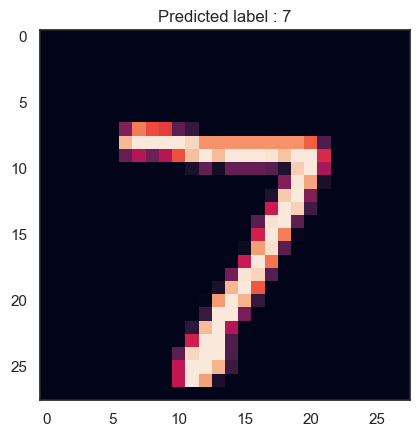

In [ ]:
arg_pred_y2 = np.argmax(pred_ys2[0],axis=0)
plt.imshow(x_test[0])
plt.title('Predicted label : {}'.format(arg_pred_y2))
plt.show()

## 콜백
tf.keras.callbacks.*
- ModelCheckpoint
    중간중간 저장
- Earlystopping
    학습안되면 그만둠
- LearningRateSchduler
    학습율 동적으로 변화
- TensorBoard
    모델의 경과 모니터

In [ ]:
from tensorflow.keras.callbacks import *

In [ ]:
Check_point_cb = ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train,y_train,epochs=10,callbacks=[Check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.0442 - accuracy: 0.9887
Epoch 2/10
  58/1313 [>.............................] - ETA: 2s - loss: 0.0208 - accuracy: 0.9930

c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0176 - accuracy: 0.9944
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0159 - accuracy: 0.9951
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0147 - accuracy: 0.9955
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0139 - accuracy: 0.9957
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0127 - accuracy: 0.9963
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0129 - accuracy: 0.9960


In [ ]:
##최상의 모델만을 저장(validation 최대값)
Check_point_cb = ModelCheckpoint('keras_mnist_model.h5',save_best_only=True)
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val),callbacks=[Check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.2058 - val_accuracy: 0.9724
Epoch 2/10
  84/1313 [>.............................] - ETA: 2s - loss: 0.0066 - accuracy: 0.9978

c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 6s 4ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.2110 - val_accuracy: 0.9708
Epoch 3/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.1843 - val_accuracy: 0.9743
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.2244 - val_accuracy: 0.9711
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.2155 - val_accuracy: 0.9702
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0089 - accuracy: 0.9973 - val_loss: 0.1869 - val_accuracy: 0.9743
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0063 - accuracy: 0.9983 - val_loss: 0.2555 - val_accuracy: 0.9667
Epoch 8/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.1988 - val_accuracy: 0.9754
Epo

In [ ]:
## EarlyStopping
Check_point_cb = ModelCheckpoint('keras_mnist_model.h5',save_best_only=True)
## patience : 몇번 학습동안 성능이 올라가는지 확인
early_stopping_cb = EarlyStopping(patience=3, monitor='val_loss',restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,callbacks=[Check_point_cb,early_stopping_cb])


Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.2182 - val_accuracy: 0.9722
Epoch 2/10
  84/1313 [>.............................] - ETA: 2s - loss: 0.0053 - accuracy: 0.9978

c:\Users\pop75\anaconda3\envs\Lee\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1313/1313 [==============================] - 3s 2ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.2172 - val_accuracy: 0.9742
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.2198 - val_accuracy: 0.9729
Epoch 4/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.1887 - val_accuracy: 0.9754
Epoch 5/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.2075 - val_accuracy: 0.9737
Epoch 6/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1992 - val_accuracy: 0.9728
Epoch 7/10
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.2475 - val_accuracy: 0.9676


In [ ]:
## LearnigRateScheduler

def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate
    else:
        return learning_rate*tf.math.exp(-0.1)

In [ ]:
round(model.optimizer.lr.numpy(),5)

0.001

In [ ]:
lr_scheduler_cb = LearningRateScheduler(scheduler)
## verbose : 훈련상황 출력
history = model.fit(x_train,y_train,epochs=15,
callbacks = [lr_scheduler_cb],verbose=1)

round(model.optimizer.lr.numpy(),5)

Epoch 1/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0023 - accuracy: 0.9993 - lr: 6.0653e-04
Epoch 2/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 6.0653e-04
Epoch 3/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9995 - lr: 6.0653e-04
Epoch 4/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - lr: 6.0653e-04
Epoch 5/15
1313/1313 [==============================] - 3s 2ms/step - loss: 7.8098e-04 - accuracy: 0.9998 - lr: 6.0653e-04
Epoch 6/15
1313/1313 [==============================] - 3s 2ms/step - loss: 5.5189e-04 - accuracy: 0.9998 - lr: 6.0653e-04
Epoch 7/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0026 - accuracy: 0.9991 - lr: 6.0653e-04
Epoch 8/15
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0017 - accuracy: 0.9996 - lr: 6.0653e-04
Epoch 9/15
1313/1313 [==================

0.00037

In [ ]:
## Tensorboard

log_dir = './logs'

tensor_board_cb = [TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True,write_images=True)]
model.fit(x_train,y_train,batch_size=32,validation_data=(x_val,y_val),epochs=30,callbacks=tensor_board_cb)

Epoch 1/39
1313/1313 [==============================] - 4s 3ms/step - loss: 1.6329e-06 - accuracy: 1.0000 - val_loss: 0.2594 - val_accuracy: 0.9782
Epoch 2/39
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0914e-06 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.9782
Epoch 3/39
1313/1313 [==============================] - 4s 3ms/step - loss: 7.1705e-07 - accuracy: 1.0000 - val_loss: 0.2621 - val_accuracy: 0.9786
Epoch 4/39
1313/1313 [==============================] - 4s 3ms/step - loss: 4.5724e-07 - accuracy: 1.0000 - val_loss: 0.2645 - val_accuracy: 0.9785
Epoch 5/39
1313/1313 [==============================] - 4s 3ms/step - loss: 2.8361e-07 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9787
Epoch 6/39
1313/1313 [==============================] - 4s 3ms/step - loss: 1.7134e-07 - accuracy: 1.0000 - val_loss: 0.2726 - val_accuracy: 0.9786
Epoch 7/39
1313/1313 [==============================] - 4s 3ms/step - loss: 1.0023e-07 - accuracy: 1.0000 - val_

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir {log_dir}

In [ ]:
## IMDB data deep learning

In [93]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seq(seqs,dim=10000):
    results = np.zeros((len(seqs),dim))
    for i,seq in enumerate(seqs):
        results[i,seq] = 1
    return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(16,activation='relu',input_shape = (10000,),name='Input'),
Dense(16,activation='relu',name='hidden'),
Dense(1,activation='sigmoid',name='output')])

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 16)                160016    
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model_hist = model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 8s 152ms/step - loss: 0.4517 - acc: 0.8207 - val_loss: 0.3367 - val_acc: 0.8814
Epoch 2/20
49/49 [==============================] - 2s 51ms/step - loss: 0.2696 - acc: 0.9051 - val_loss: 0.2884 - val_acc: 0.8870
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2130 - acc: 0.9244 - val_loss: 0.2833 - val_acc: 0.8875
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1801 - acc: 0.9355 - val_loss: 0.2909 - val_acc: 0.8850
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1575 - acc: 0.9441 - val_loss: 0.3042 - val_acc: 0.8800
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1388 - acc: 0.9519 - val_loss: 0.3152 - val_acc: 0.8790
Epoch 7/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1227 - acc: 0.9580 - val_loss: 0.3395 - val_acc: 0.8751
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1133 - 

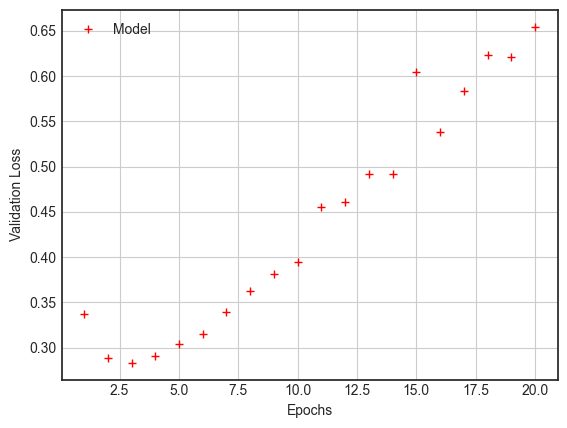

In [99]:
import matplotlib.pyplot as plt


epochs = range(1,21)
model_val_loss = model_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

과대적합과 과소적합 방지방법

- 모델 크기 축소
- 가중치 초기화
- 옵티마이저 변경 
- 배치 정규화 
- 규제화 
- 드롭아웃 

- 모델 크기 감소

In [100]:
model_s = Sequential([Dense(7,activation='relu',input_shape = (10000,),name='Input1'),
Dense(7,activation='relu',name='hidden1'),
Dense(1,activation='sigmoid',name='output1')])

model_s.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model_s.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input1 (Dense)              (None, 7)                 70007     
                                                                 
 hidden1 (Dense)             (None, 7)                 56        
                                                                 
 output1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 70071 (273.71 KB)
Trainable params: 70071 (273.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model_s_hist = model_s.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 10s 190ms/step - loss: 0.5714 - acc: 0.7530 - val_loss: 0.4272 - val_acc: 0.8701
Epoch 2/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3358 - acc: 0.8970 - val_loss: 0.3178 - val_acc: 0.8867
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2497 - acc: 0.9173 - val_loss: 0.2893 - val_acc: 0.8884
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.2068 - acc: 0.9316 - val_loss: 0.2988 - val_acc: 0.8801
Epoch 5/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1800 - acc: 0.9395 - val_loss: 0.2854 - val_acc: 0.8858
Epoch 6/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1594 - acc: 0.9477 - val_loss: 0.2921 - val_acc: 0.8843
Epoch 7/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1446 - acc: 0.9522 - val_loss: 0.3025 - val_acc: 0.8819
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1308 -

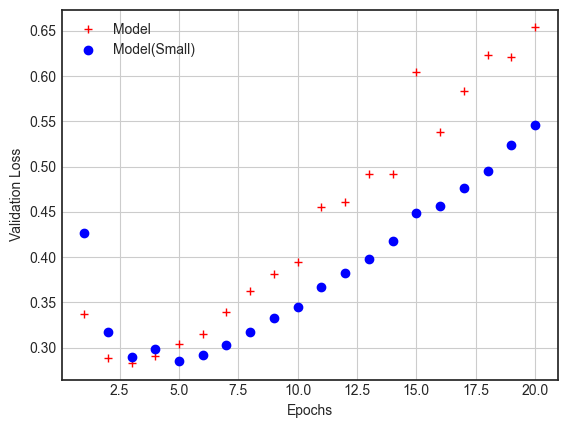

In [102]:

model_s_val_loss = model_s_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,model_s_val_loss,'bo',label="Model(Small)")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

- 모델 크기 증가

In [103]:
model_b = Sequential([Dense(1024,activation = 'relu', input_shape = (10000,),name = 'input2'),
Dense(1024,activation='relu',name = 'hidden2'),
Dense(1,activation = 'sigmoid',name = 'output2')])


model_b.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model_b.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 1024)              10241024  
                                                                 
 hidden2 (Dense)             (None, 1024)              1049600   
                                                                 
 output2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 11291649 (43.07 MB)
Trainable params: 11291649 (43.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model_b_hist = model_b.fit(x_train,y_train,batch_size=512,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 19s 377ms/step - loss: 0.5267 - acc: 0.7548 - val_loss: 0.3402 - val_acc: 0.8637
Epoch 2/20
49/49 [==============================] - 11s 222ms/step - loss: 0.2807 - acc: 0.8854 - val_loss: 0.2697 - val_acc: 0.8892
Epoch 3/20
46/49 [===========================>..] - ETA: 0s - loss: 0.2119 - acc: 0.9157

KeyboardInterrupt: 

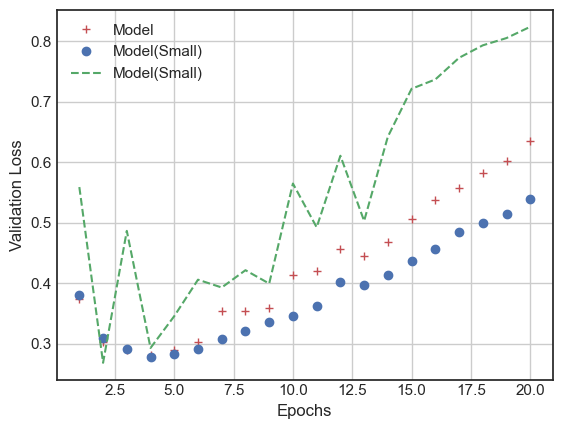

In [ ]:

model_b_val_loss = model_b_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,model_s_val_loss,'bo',label="Model(Small)")
plt.plot(epochs,model_b_val_loss,'g--',label="Model(big)")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

- 볼륨이 큰 신경망일스록 빠르게 훈련은 가능하지만 과대적합에 민감해진다다

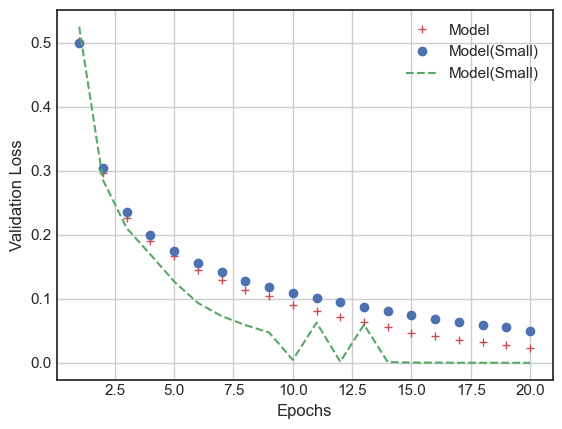

In [ ]:
model_train_loss = model_hist.history['loss']
model_s_train_loss = model_s_hist.history['loss']
model_b_train_loss = model_b_hist.history['loss']

plt.plot(epochs,model_train_loss,'r+',label='Model')
plt.plot(epochs,model_s_train_loss,'bo',label="Model(Small)")
plt.plot(epochs,model_b_train_loss,'g--',label="Model(Small)")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

## 확률적 경사 하강법

- 전체를 한번에 계산하지 않고 일부 샘플을 뽑아오면서 학습
- 메모리 절약 가능, 큰 세트 학습가능
- 확률적이라 불안정
- 손실함수의 최소값을 갈때 다소 요동이 많음
- 이러한 단점을 보완하기 위해 미니 배치 하강법 사용
- SGD 단점 : 문제에 따라서 시간이 매우 오래걸린다

- 수식

$W$ &larr; $W - \gamma dL/dW$

$\gamma$ : 학습률

Momentum
- 운동량을 의미, 관성과 관련
- 이전의 속도를 유지하려는 경향
- 경사하강을 좀 더 유지하려는 성격 지님
- 단순히 SGD사용하는 것보다 조금 적게 방향 변함

$v$ &larr;  $\alpha v - \gamma dL/dW$

$W$ &larr; $W + v$

$\alpha$ : 관성계수

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate = 0.001, momentum =0.9)

## Nesterov

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그래디언트를 구함
- 시간이 지날수록 조금 더 빨리 최솟값에 도달
- 수식

- $m$ &larr; $ \beta m - n \Delta_\theta J(\theta + \beta m )$ 

- $\theta$ &larr; $\theta + m$

In [ ]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

## AdaGrad(Adaptive Gradient)

- 가장 가파른 경사를 따라 빠르게 하강하는 방법
- 학습률을 변화시키면서 학습함(Adative)
- 간단한 문제에서는 좋을 수 있지만 딥러닝에서는 자주 안쓰임
- 학습률이 너무 감소되어 학습종료 확률이 높음
- AdaGrad 수식

    $h$ &larr; $h+ \delta L/\delta W * \delta L/\delta W$

    $W$ &larr; $\gamma 1/(\sqrt h) \delta L/\delta W$

In [ ]:
from tensorflow.keras.optimizers import Adagrad

optimizer = Adagrad(learning_rate=0.001)

## RMSProp (Root Mean square propagation)

- AdaGrad 보완하는 방법
- 합 대신 지수평균값 사용
- 학습이 안되기 시작하면 학습률이 커지게하고 학습률이 너무 크면 학습률 다시 줄임

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001,rho=0.9)

## Adam(Adaptive Moment Estimation)

- 모멘텀 최적화와 RMSProp의 아이디어를 합친것
- 가장 많이 쓰이는 옵티마이저
- 지난 그래디언트의 지수 감소 평균을 따르고(Momentum), 지난 그래디언트 제곱의 지수 감소된 평균(RMSProp)을 따름

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9,beta_2=0.999)

## 가중치 초기화
- 자비에로 초기화, He 초기화

## 가중치 소실

- 시그모이드 함수가 활성함수일 때 은닉층의 개수가 늘어날수록 가중치가 역전파되면서 가중치 소실
    - 0 ~ 1 사이의 값으로 출력되면서 0 또는 1에 값이 퍼짐
    - ReLU 함수가 대안으로 등장(비선형)
- 가중치 초기화 문제
    - 가중치가 한쪽으로 몰리면 활성화 함수를 통과한 값들이 치우치게 되므로 골고루 분포해야함

초기값 : 0

In [ ]:
from tensorflow.keras.layers import Dense,LeakyReLU,Activation
from tensorflow.keras.models import Sequential

model = Sequential([Dense(30,kernel_initializer = 'he_normal',input_shape=[10,10]),LeakyReLU(alpha=0.2),
Dense(1,kernel_initializer='he_normal'),
Activation('softmax')])


model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_16 (Dense)            (None, 10, 1)             31        
                                                                 
 activation_1 (Activation)   (None, 10, 1)             0         
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 배치 정규화

- 모델에 주입되는 샘플들을 균일하게 만드는 ㅂ아법
- 가중치의 활성화 값이 적당히 퍼지도록함
- 미니배치 단위로 데이터의 평균이 0, 표준편차 1로 정규화
- 학습 빠름
- 초기값 의존도 낮아짐
- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌
- 과대적합 방지
- 데이터 전처리 단계에보다 활성화 함수 이전에 함
- Dense 또는 Conv2D layer후 활성화 함수 이전에 놓임

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Dense(32,input_shape=(28*28,),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
Total params: 25248 (98.62 KB)
Trainable params: 25184 (98.38 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________


## 규제화(Regularization) - 가중치감소
- 과대적합을 방지하는 방법 중 하나
- 과대적합은 가중치의 매개변수 값이 커서 발생하는 경우가 많음
- 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미

In [ ]:
from tensorflow.keras.regularizers import l1,l2,l1_l2

l2_model = Sequential([Dense(16,kernel_regularizer=l2(0.01),activation='relu',input_shape=(10000,)),
Dense(16,kernel_regularizer=l2(0.01),activation='relu',input_shape=(10000,)),
Dense(1,activation='sigmoid')])

l2_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

l2_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                160016    
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
l2_model_hist = l2_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 13s 248ms/step - loss: 0.7728 - acc: 0.8015 - val_loss: 0.6148 - val_acc: 0.8633
Epoch 2/20
49/49 [==============================] - 1s 22ms/step - loss: 0.5526 - acc: 0.8769 - val_loss: 0.5306 - val_acc: 0.8738
Epoch 3/20
49/49 [==============================] - 1s 18ms/step - loss: 0.4933 - acc: 0.8844 - val_loss: 0.4964 - val_acc: 0.8761
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4606 - acc: 0.8922 - val_loss: 0.4719 - val_acc: 0.8790
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4355 - acc: 0.8962 - val_loss: 0.4543 - val_acc: 0.8801
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.4183 - acc: 0.8994 - val_loss: 0.4422 - val_acc: 0.8819
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4057 - acc: 0.9022 - val_loss: 0.4336 - val_acc: 0.8818
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3955 -

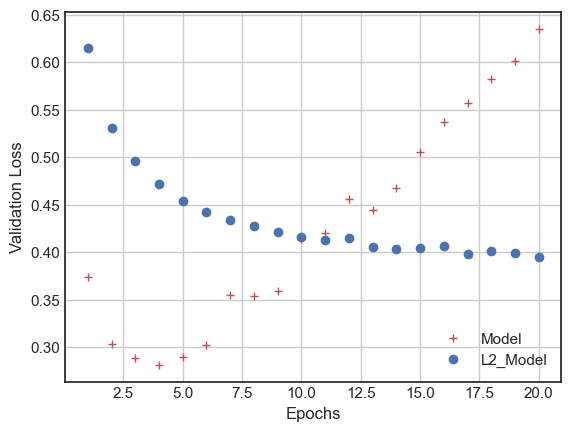

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,l2_model_val_loss,'bo',label="L2_Model")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

In [ ]:
from tensorflow.keras.regularizers import l1,l2,l1_l2

l1_model = Sequential([Dense(16,kernel_regularizer=l1(0.0001),activation='relu',input_shape=(10000,)),
Dense(16,kernel_regularizer=l1(0.0001),activation='relu',input_shape=(10000,)),
Dense(1,activation='sigmoid')])

l1_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

l1_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                160016    
                                                                 
 dense_31 (Dense)            (None, 16)                272       
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
l1_model_hist = l1_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 28s 541ms/step - loss: 0.6184 - acc: 0.7998 - val_loss: 0.4496 - val_acc: 0.8692
Epoch 2/20
49/49 [==============================] - 2s 44ms/step - loss: 0.3749 - acc: 0.8930 - val_loss: 0.3710 - val_acc: 0.8850
Epoch 3/20
49/49 [==============================] - 1s 31ms/step - loss: 0.3214 - acc: 0.9098 - val_loss: 0.3566 - val_acc: 0.8871
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3003 - acc: 0.9179 - val_loss: 0.3646 - val_acc: 0.8821
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2846 - acc: 0.9247 - val_loss: 0.3633 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2756 - acc: 0.9294 - val_loss: 0.3695 - val_acc: 0.8844
Epoch 7/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2674 - acc: 0.9330 - val_loss: 0.3771 - val_acc: 0.8830
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2602 -

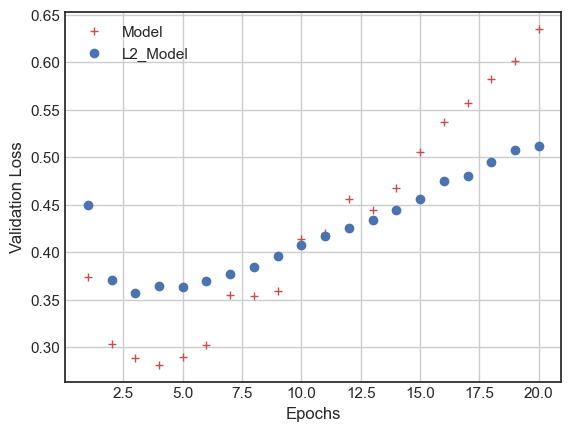

In [ ]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,l1_model_val_loss,'bo',label="L2_Model")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

In [ ]:
l1_l2_model = Sequential([Dense(16,kernel_regularizer=l1_l2(l1=0.0001,l2=0.0001),activation='relu',input_shape=(10000,)),
Dense(16,kernel_regularizer=l1_l2(l1=0.0001,l2=0.0001),activation='relu',input_shape=(10000,)),
Dense(1,activation='sigmoid')])

l1_l2_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

l1_l2_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 16)                160016    
                                                                 
 dense_34 (Dense)            (None, 16)                272       
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
l1_l2_model_hist = l1_l2_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 17s 311ms/step - loss: 0.6021 - acc: 0.8041 - val_loss: 0.4279 - val_acc: 0.8766
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.3638 - acc: 0.8995 - val_loss: 0.3755 - val_acc: 0.8860
Epoch 3/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3249 - acc: 0.9138 - val_loss: 0.3731 - val_acc: 0.8840
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.3082 - acc: 0.9203 - val_loss: 0.3795 - val_acc: 0.8823
Epoch 5/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2970 - acc: 0.9256 - val_loss: 0.3814 - val_acc: 0.8837
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2881 - acc: 0.9288 - val_loss: 0.3898 - val_acc: 0.8817
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2839 - acc: 0.9313 - val_loss: 0.3974 - val_acc: 0.8805
Epoch 8/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2748 -

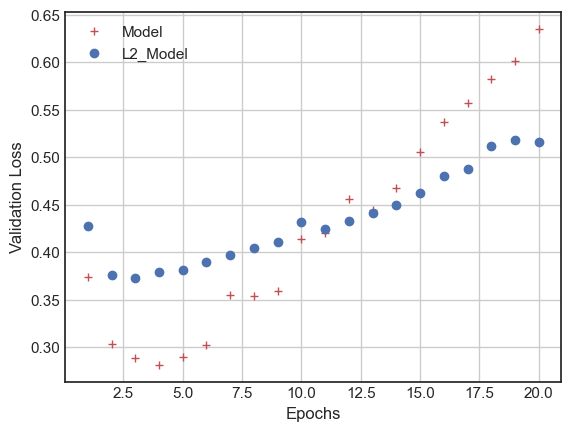

In [ ]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,l1_l2_model_val_loss,'bo',label="L2_Model")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

## 드롭아웃

- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법
- 과적합을 방지
- 학습할 때 사용하는 노드의 수를 전체 노드 중에서 일부만을 사용
- 신경마의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
    - 예를들어, [1.0,3.2,0.6] 라는 벡터에 드롭아웃을 적용하면 무작위로 0으로 바뀜 &larr; [0,3.2,0.6]
    - 보통 0.2~0.5 사이의 비율로 지정
- 테스트 단계에서는 어떤 노드도 드롭아웃 되지 않고 대신 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [ ]:
from tensorflow.keras.layers import Dropout
Dropout_model = Sequential([Dense(16,activation='relu',input_shape=(10000,)),
Dropout(0.5),
Dense(16,activation='relu',input_shape=(10000,)),
Dropout(0.5),
Dense(1,activation='sigmoid')])

Dropout_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

Dropout_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
dropout_model_hist = Dropout_model.fit(x_train,y_train,epochs=20,batch_size=512,validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 15s 290ms/step - loss: 0.6302 - acc: 0.6354 - val_loss: 0.4988 - val_acc: 0.8402
Epoch 2/20
49/49 [==============================] - 1s 21ms/step - loss: 0.4640 - acc: 0.8112 - val_loss: 0.3612 - val_acc: 0.8798
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3551 - acc: 0.8713 - val_loss: 0.2982 - val_acc: 0.8843
Epoch 4/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2905 - acc: 0.9002 - val_loss: 0.2912 - val_acc: 0.8858
Epoch 5/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2402 - acc: 0.9192 - val_loss: 0.2843 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2078 - acc: 0.9338 - val_loss: 0.2971 - val_acc: 0.8845
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1835 - acc: 0.9411 - val_loss: 0.3095 - val_acc: 0.8826
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1576 -

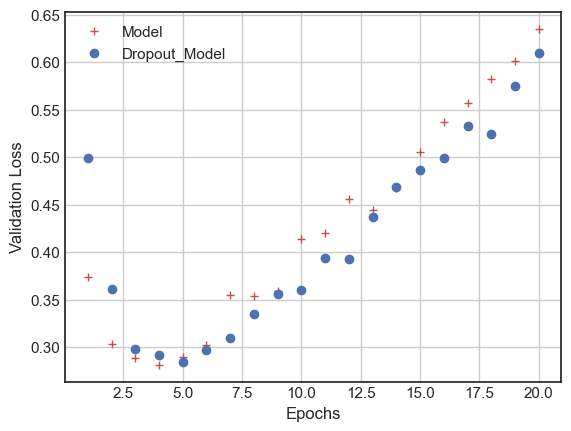

In [ ]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs,model_val_loss,'r+',label='Model')
plt.plot(epochs,dropout_model_val_loss,'bo',label="Dropout_Model")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

## 하이퍼 파라미터

- 학습률
- 학습횟수
- 미니배치 크기
- 검증 데이터
    - 20~30% 테스트 데이터 나머지에서 20% 정도를 검증용으로 사용


## Fashion MNIST 모델

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import models
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

데이터 로드

In [ ]:
tf.random.set_seed(131)

(x_train_full,y_train_full),(x_test,y_test) = load_data()

x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.3,random_state=111)


In [ ]:
print("학습 데이터 : {}\t레이블 : {}".format(x_train_full.shape,y_train_full.shape))
print("학습 데이터 : {}\t레이블 : {}".format(x_train.shape,y_train.shape))
print("검증 데이터 : {}\t레이블 : {}".format(x_val.shape,y_val.shape))
print("테스트 데이터 : {}\t레이블 : {}".format(x_test.shape,y_test.shape))

학습 데이터 : (60000, 28, 28)	레이블 : (60000,)
학습 데이터 : (42000, 28, 28)	레이블 : (42000,)
검증 데이터 : (18000, 28, 28)	레이블 : (18000,)
테스트 데이터 : (10000, 28, 28)	레이블 : (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trousser', 'Pullover', 'Dress','Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' ]

In [ ]:
y_train[5]

6

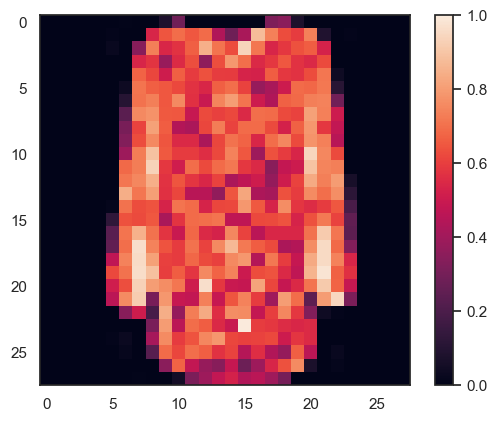

In [ ]:
plt.figure()
plt.imshow(x_train_2D[5])
plt.colorbar()
plt.grid(False)
plt.show()

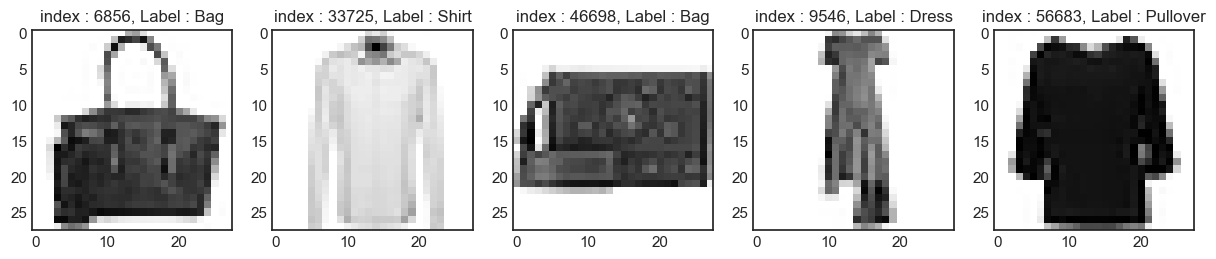

In [ ]:
num_sample = 5
random_idxs = np.random.randint(60000,size = num_sample)

plt.figure(figsize=(15,10))
for i,idx in enumerate(random_idxs):
    image = x_train_full[idx,:]
    label = y_train_full[idx]

    plt.subplot(1,len(random_idxs),i+1)
    plt.imshow(image)
    plt.title('index : {}, Label : {}'.format(idx,class_names[label]))

데이터 전처리
- Nomalize
- Flatten
- loss = 'sparse_categorical_crossentropy'

In [ ]:
x_train = (x_train.reshape(-1,28*28))/255.
x_val = (x_val.reshape(-1,28*28))/255.
x_test = (x_test.reshape(-1,28*28))/255.

모델구성

In [ ]:
input_ = Input(shape=(784,),name = 'input')
hidden1 = Dense(512,activation = 'relu', name = 'hidden1')(input_)
hidden2 = Dense(256,activation = 'relu', name = 'hidden2')(hidden1)
hidden3 = Dense(128,activation = 'relu', name = 'hidden3')(hidden2)
hidden4 = Dense(64,activation = 'relu', name = 'hidden4')(hidden3)
hidden5 = Dense(32,activation = 'relu', name = 'hidden5')(hidden4)
output = Dense(10,activation = 'softmax',name = 'output')(hidden5)
model = Model(inputs = [input_], outputs = [output])

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 256)               131328    
                                                                 
 hidden3 (Dense)             (None, 128)               32896     
                                                                 
 hidden4 (Dense)             (None, 64)                8256      
                                                                 
 hidden5 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330 

모델 컴파일 및 학습 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['acc'])

In [ ]:
history = model.fit(x_train,y_train,epochs=40,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/40
151/165 [==========================>...] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

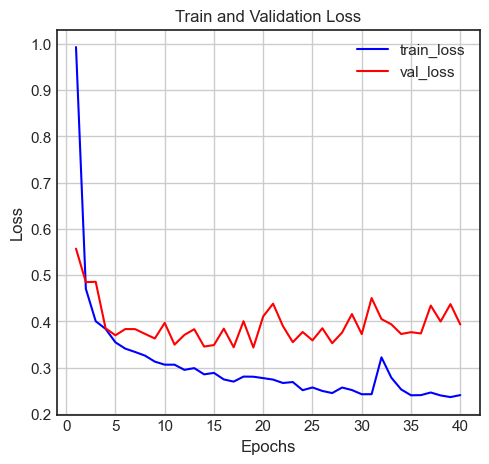

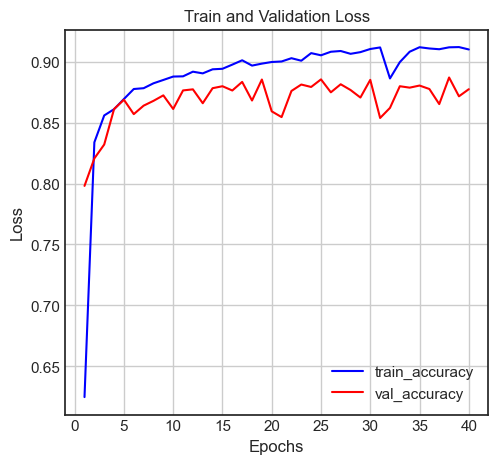

In [ ]:
history.history.keys()
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_accuracy')
ax2.plot(epochs,val_loss,color='red',label='val_accuracy')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()


plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4248 - acc: 0.8659


[0.4248355031013489, 0.8658999800682068]

In [ ]:
pred_ys = model.predict(x_test)

print(pred_ys.shape)
np.set_printoptions(precision=7)
print(pred_ys[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[4.3416244e-09 2.7195752e-15 1.8910384e-11 7.4343101e-12 4.2664081e-11
 1.1026429e-05 8.1410802e-11 6.4156181e-03 5.4601043e-07 9.9357283e-01]


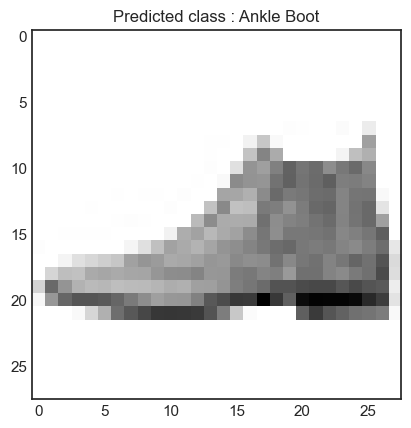

In [ ]:
arg_pred_y = np.argmax(pred_ys,axis=1)
plt.imshow(x_test[0].reshape(-1,28))
plt.title('Predicted class : {}'.format(class_names[arg_pred_y[0]]))
plt.show()


In [ ]:
def plot_image(i,pred_ys,y_test,img):
    pred_ys,y_test,img = pred_ys[i],y_test[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else : 
        color = 'red'

    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.max(pred_ys),class_names[y_test]),color=color)

def plot_value_array(i,pred_ys,true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),pred_ys, color = "#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(pred_ys)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

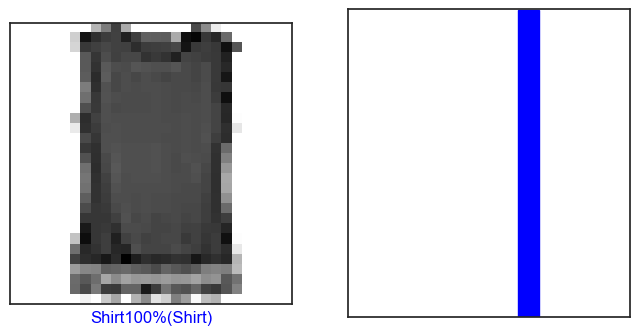

In [ ]:
i = 561
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i,pred_ys,y_test,x_test.reshape(-1,28,28))
plt.subplot(1,2,2)
plot_value_array(i,pred_ys,y_test)
plt.show()

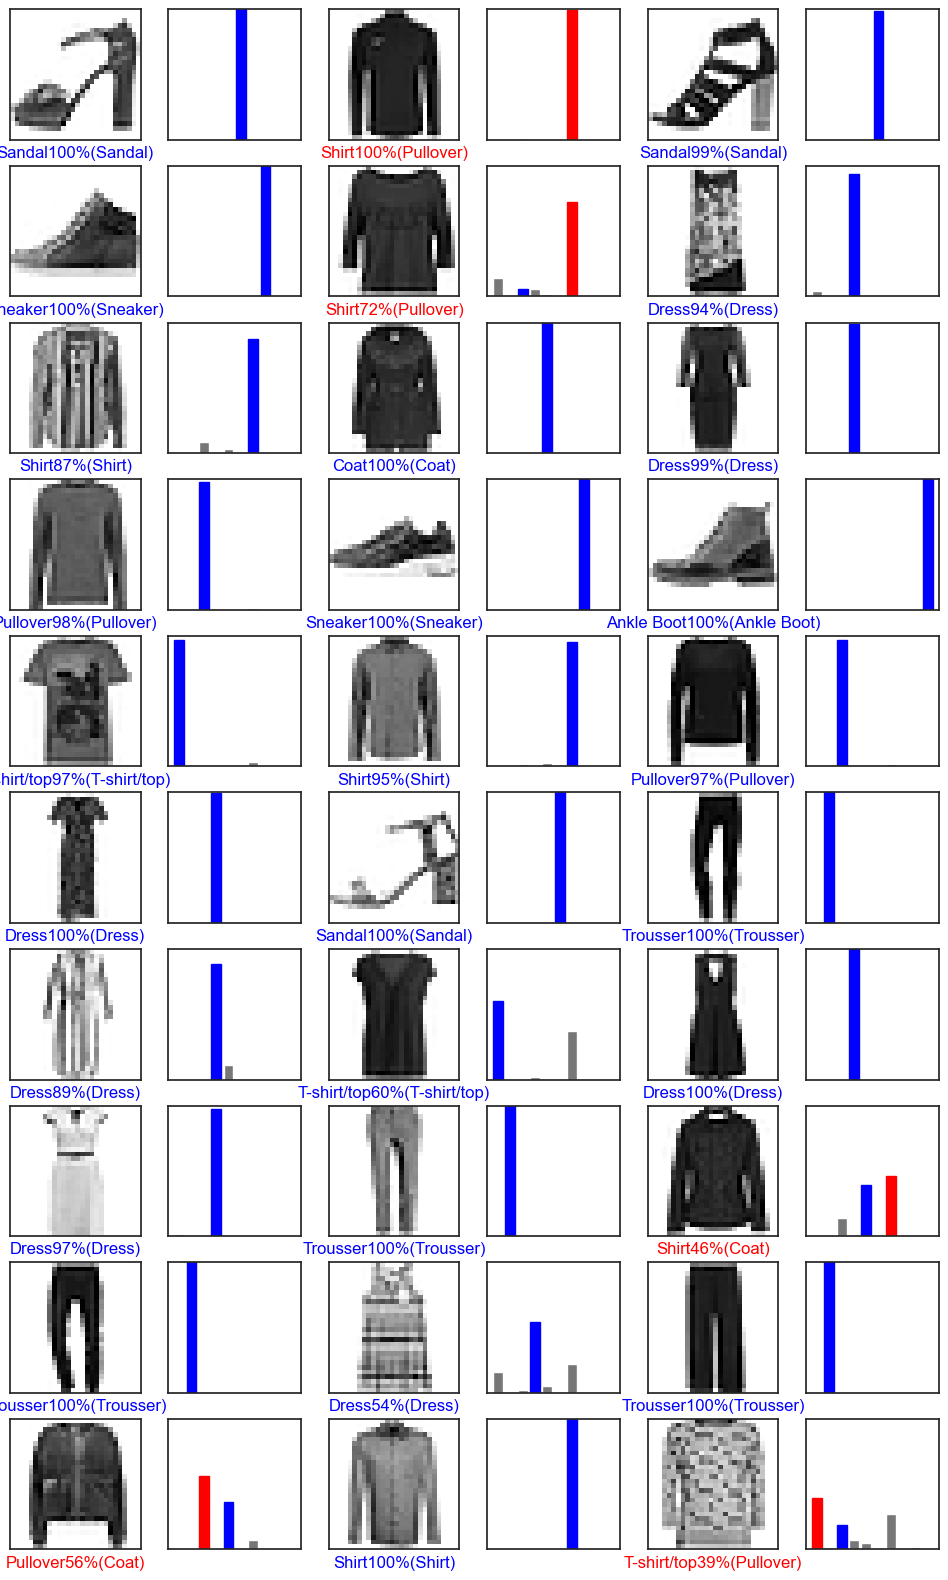

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000,size=num_images)
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows,2*num_cols,2*idx+1)
    plot_image(num,pred_ys,y_test,x_test.reshape(-1,28,28))
    plt.subplot(num_rows,2*num_cols,2*idx+2)
    plot_value_array(num,pred_ys,y_test)
plt.show()


혼동 행렬

In [ ]:
from tensorflow.keras.utils import to_categorical

y_test_che = to_categorical(y_test)
y_test_che.shape

(10000, 10)

Text(47.25, 0.5, 'True Label')

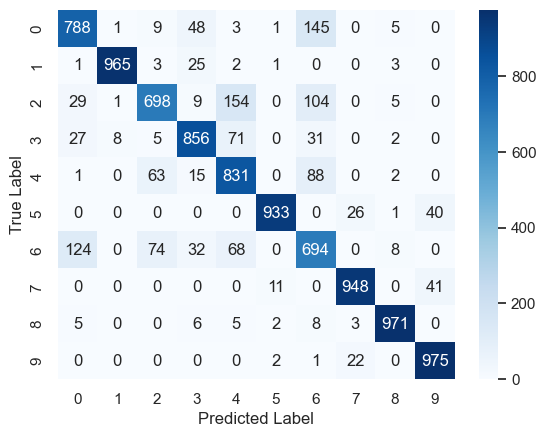

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.Figure(figsize=(8,8))
cm2 = confusion_matrix(np.argmax(y_test_che,axis=1),np.argmax(pred_ys,axis=1))
## data : cm2, annot : 수 표기할지 fmt : 표기하는 수 형식, cmap:색깔지정
sns.heatmap(cm2,annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
print(classification_report(np.argmax(y_test_che,axis=-1),np.argmax(pred_ys,axis=-1) ))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.70      0.75      1000
           3       0.86      0.86      0.86      1000
           4       0.73      0.83      0.78      1000
           5       0.98      0.93      0.96      1000
           6       0.65      0.69      0.67      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.92      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D

In [ ]:
x_train_2D = x_train.reshape(-1,28,28,1)
x_val_2D = x_val.reshape(-1,28,28,1)
x_train_2D.shape

(42000, 28, 28, 1)

In [ ]:
inputs = Input(shape=(28,28,1,),name='input')
hidden1 = Conv2D(36,kernel_size=(3,3),strides=1,padding='same',activation='relu')(inputs)
hidden2 = Conv2D(16,kernel_size=(3,3),padding='same',activation='relu')(hidden1)
hidden3 = MaxPool2D(pool_size=(2,2))(hidden2)
hidden4 = Flatten()(hidden3)
hidden5 = Dense(120,activation = 'relu')(hidden4)
hidden6 = Dense(84,activation = 'relu')(hidden5)
outputs = Dense(10,activation = 'softmax')(hidden6)

model = Model(inputs= [inputs], outputs=[outputs])
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 36)        360       
                                                                 
 conv2d_51 (Conv2D)          (None, 28, 28, 16)        5200      
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_17 (Flatten)        (None, 3136)              0         
                                                                 
 dense_64 (Dense)            (None, 120)               376440    
                                                          

In [ ]:
inputs = Input(shape=(28,28),name='input')
inputs.shape

TensorShape([None, 28, 28])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.01),metrics=['acc'])

In [ ]:
history = model.fit(x_train_2D,y_train,batch_size=512,epochs=20,validation_data=(x_val_2D,y_val))

Epoch 1/20
83/83 [==============================] - 22s 247ms/step - loss: 0.5898 - acc: 0.7854 - val_loss: 0.4108 - val_acc: 0.8534
Epoch 2/20
83/83 [==============================] - 21s 254ms/step - loss: 0.3172 - acc: 0.8850 - val_loss: 0.3148 - val_acc: 0.8853
Epoch 3/20
83/83 [==============================] - 21s 253ms/step - loss: 0.2499 - acc: 0.9074 - val_loss: 0.4028 - val_acc: 0.8673
Epoch 4/20
83/83 [==============================] - 27s 326ms/step - loss: 0.2245 - acc: 0.9178 - val_loss: 0.3490 - val_acc: 0.8763
Epoch 5/20
83/83 [==============================] - 37s 449ms/step - loss: 0.2025 - acc: 0.9242 - val_loss: 0.2592 - val_acc: 0.9097
Epoch 6/20
83/83 [==============================] - 42s 511ms/step - loss: 0.1637 - acc: 0.9389 - val_loss: 0.2663 - val_acc: 0.9060
Epoch 7/20
83/83 [==============================] - 39s 465ms/step - loss: 0.1531 - acc: 0.9435 - val_loss: 0.3246 - val_acc: 0.9030
Epoch 8/20
83/83 [==============================] - 40s 482ms/step - 

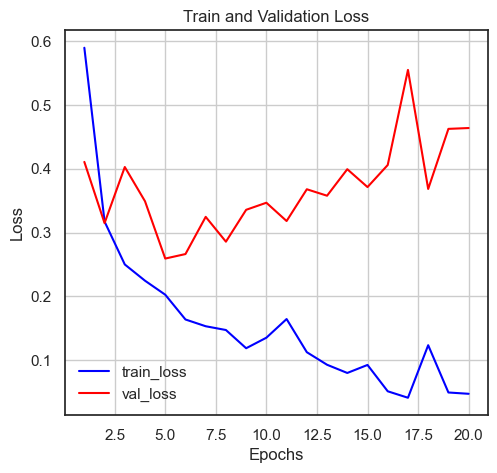

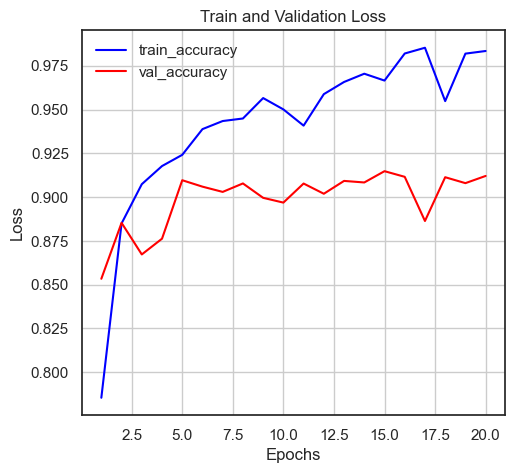

In [ ]:
history.history.keys()
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='blue',label='train_loss')
ax1.plot(epochs,val_loss,color='red',label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()


loss = history_dict['acc']
val_loss = history_dict['val_acc']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12,5))

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs,loss,color='blue',label='train_accuracy')
ax2.plot(epochs,val_loss,color='red',label='val_accuracy')
ax2.set_title('Train and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.grid()
ax2.legend()


plt.show()

In [ ]:
y_train

array([2, 9, 1, ..., 8, 7, 0], dtype=uint8)

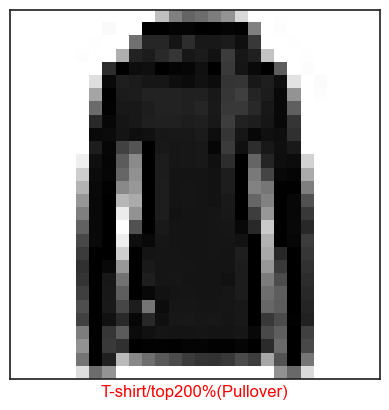

In [ ]:
plot_image(10,y_train,y_train,x_train_2D)

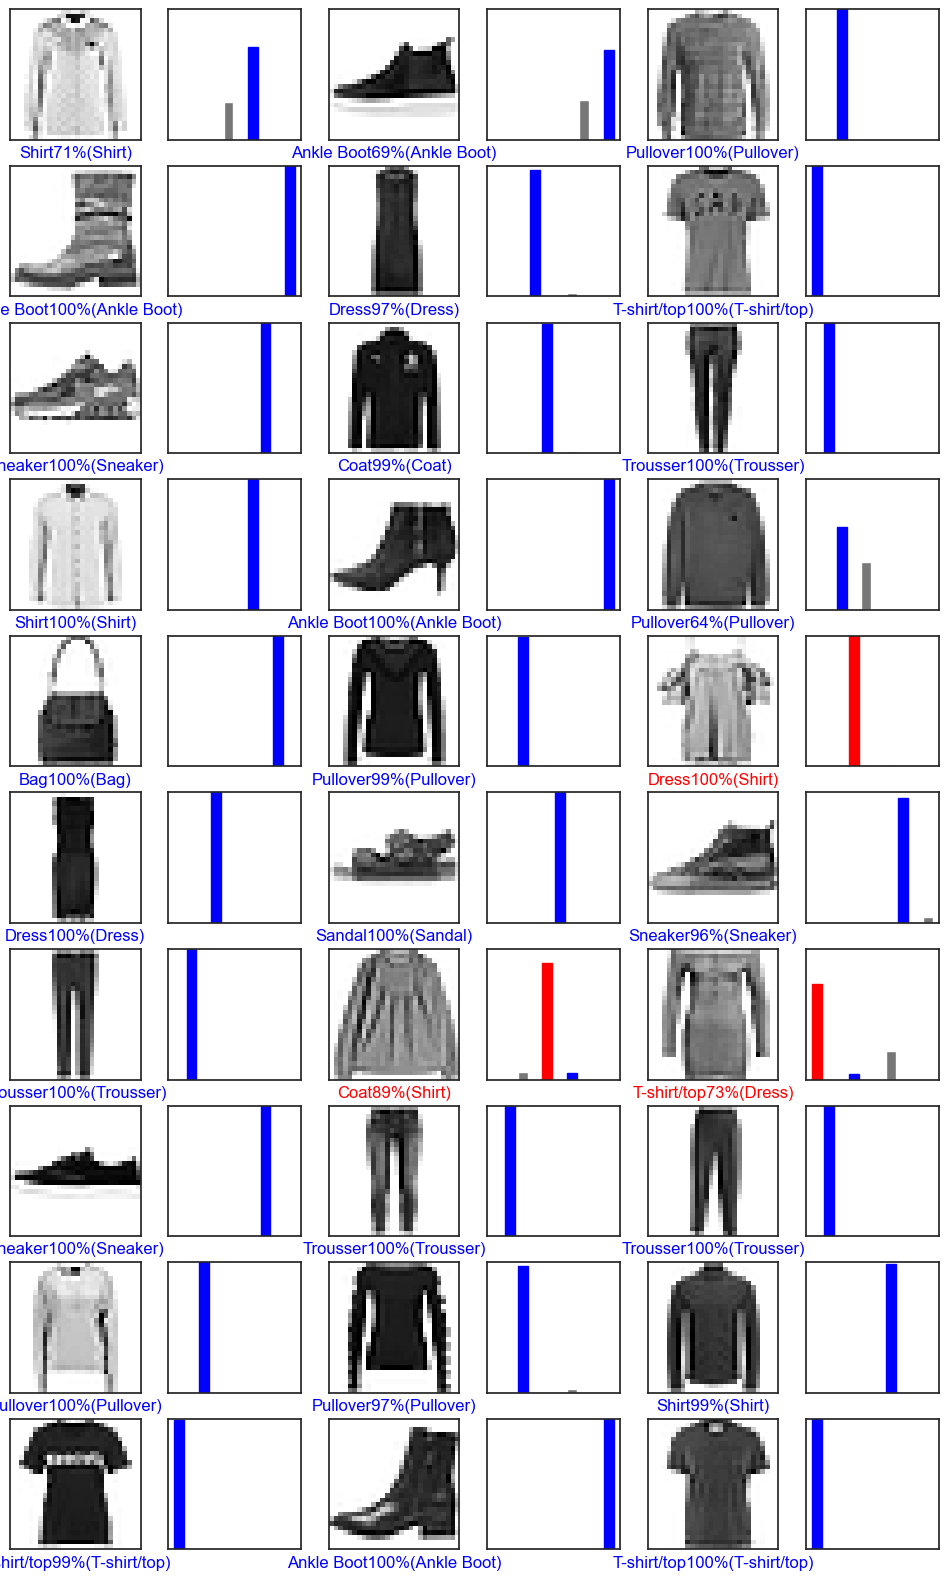

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols

random_num = np.random.randint(10000,size=num_images)
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows,2*num_cols,2*idx+1)
    plot_image(num,pred_ys,y_test,x_test.reshape(-1,28,28))
    plt.subplot(num_rows,2*num_cols,2*idx+2)
    plot_value_array(num,pred_ys,y_test)
plt.show()

In [105]:
from tensorflow.keras.layers import MultiHeadAttention

In [ ]:
model = Sequential()